In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv(r"S:\Datasets\ML Datasets\Churn_Modelling.csv")

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.shape

(10000, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
# lets drop the features that are not effective and not useful for target prediction.
# in the above dataset rownumber and customerid and surname are not very much useful for model.so,we are just dropping these columns.

df = df.drop(columns = ['RowNumber','CustomerId','Surname'],axis = 1)

In [32]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# lets analyse some statistical analysis
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [42]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

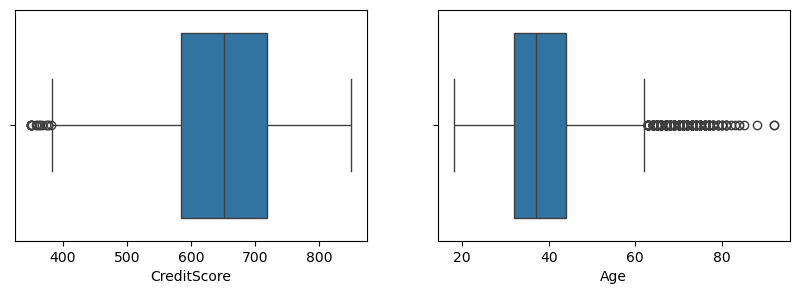

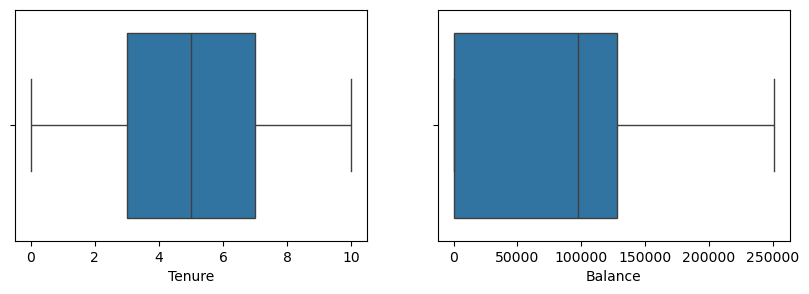

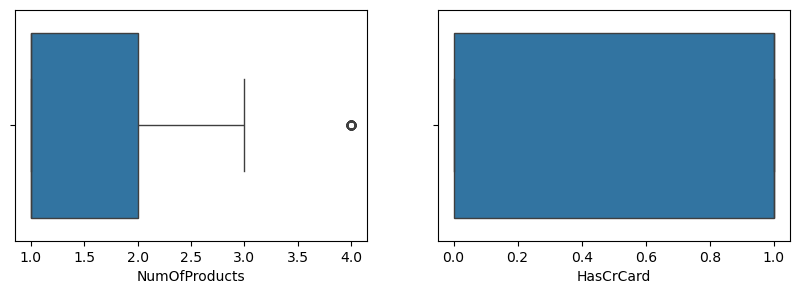

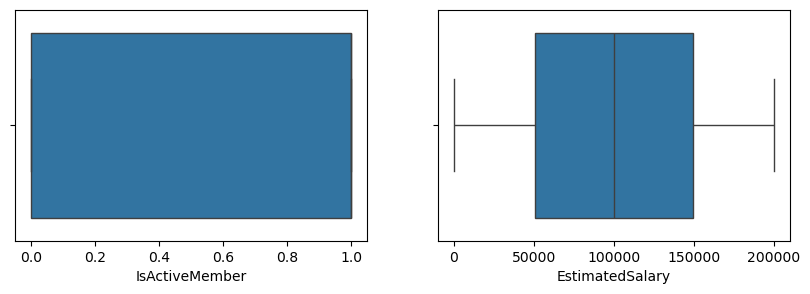

In [62]:
# since we dont have any null values lets check for outliers.
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',]
i=0
while i < len(num_col):
    fig = plt.figure(figsize=[10,3])
    plt.subplot(1,2,1)
    sb.boxplot(x=num_col[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sb.boxplot(x=num_col[i], data=df)
    i += 1
    plt.show()

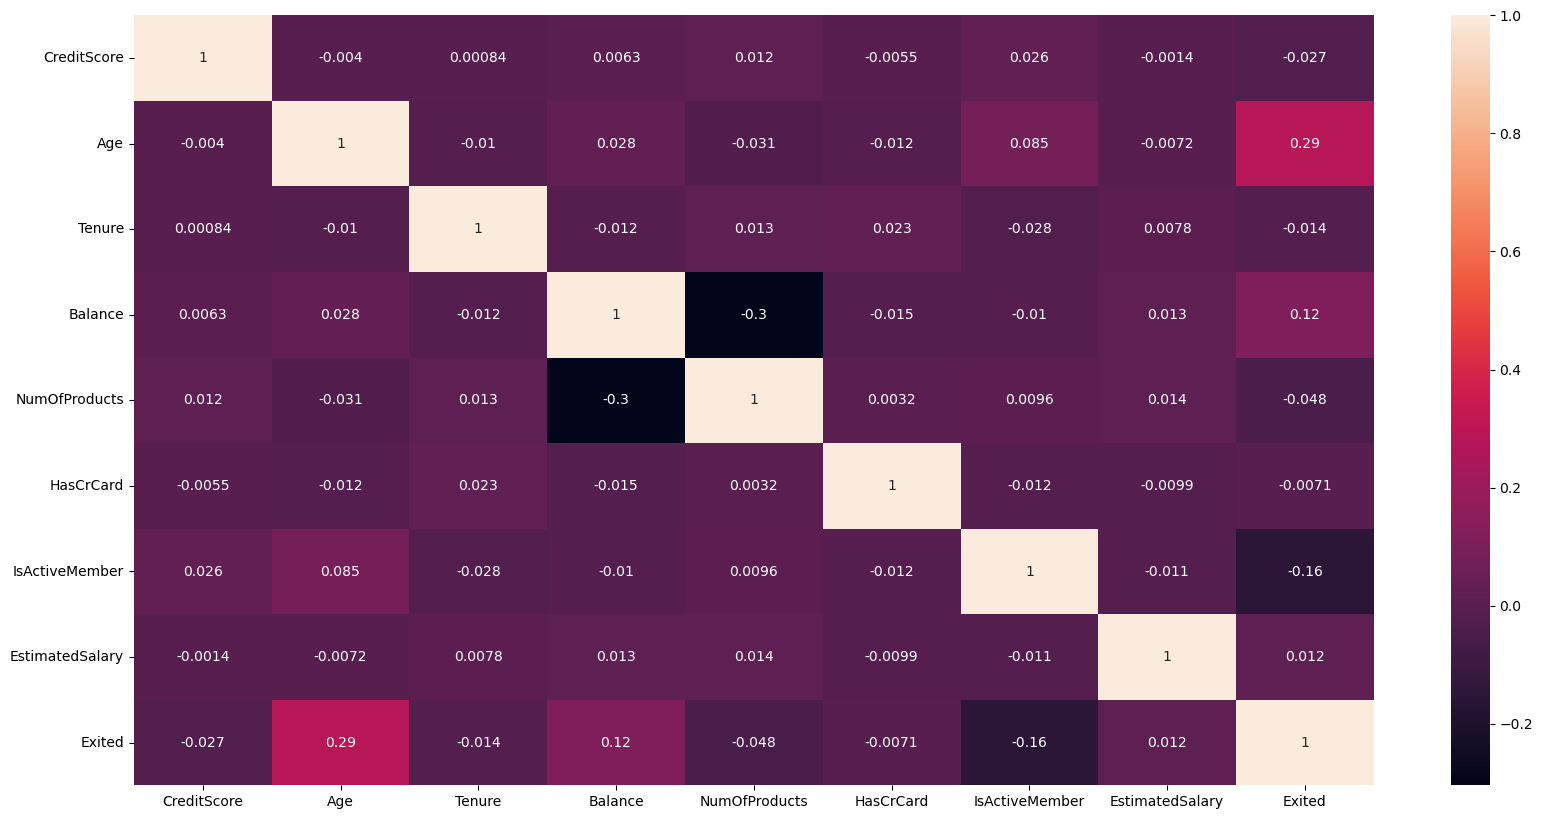

In [76]:
# lets visualize the correlation between variables.

corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']].corr()

plt.figure(figsize = (20,10))
sb.heatmap(corr,annot=True,fmt='.2g')
plt.show()

In [78]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [92]:
# lets convert the categorical features to numerical fearures.
# Since the Geography and Gender Nominal data, lets choose OneHotEncoding for feature conversion  

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_data = encoder.fit_transform(df[['Geography','Gender']])
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['Geography','Gender']))
df1 = pd.concat([df,encoded_df],axis = 1)

In [96]:
# lets drop the Geography and Gender features
df1 = df1.drop(columns = ['Geography','Gender'], axis = 1)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [100]:
# lets seperate the data into features and target

x = df1.drop('Exited',axis=1)
y = df1['Exited']

### 1. Linear Regression

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,classification_report

In [106]:
# splitting the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [144]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [324]:
y_pred1 = linear_model.predict(x_test).round()

In [326]:
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.187


In [328]:
r2_score(y_test,y_pred1)

-0.18438574240243466

In [330]:
accuracy_score(y_test,y_pred1)

0.813

### 2. Logistic Regression :

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(x_train, y_train)

y_pred2 = logistic_model.predict(x_test)

In [334]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred2)}")

Accuracy Score : 0.811


In [336]:
print(confusion_matrix(y_test,y_pred2))

[[1543   64]
 [ 314   79]]


In [338]:
print(f"Classification Report : \n\n {classification_report(y_test,y_pred2)}")

Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### 3. Decision Tree :

In [362]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_model.fit(x_train, y_train)
y_pred3 = decision_model.predict(x_test)

In [364]:
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [366]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred3)}")

Accuracy Score : 0.8485


In [368]:
print(f"Confusion Matrix :\n\n{confusion_matrix(y_pred3, y_test)}")

Confusion Matrix :

[[1527  223]
 [  80  170]]


In [374]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



[Text(0.5, 0.875, 'x[1] <= 0.533\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(0.25, 0.625, 'x[4] <= 1.671\ngini = 0.228\nsamples = 6130\nvalue = [5324.0, 806.0]'),
 Text(0.125, 0.375, 'x[4] <= -0.054\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(0.0625, 0.125, 'gini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 3035\nvalue = [2886, 149]'),
 Text(0.375, 0.375, 'x[3] <= -0.306\ngini = 0.315\nsamples = 143\nvalue = [28, 115]'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 56\nvalue = [22, 34]'),
 Text(0.4375, 0.125, 'gini = 0.128\nsamples = 87\nvalue = [6, 81]'),
 Text(0.75, 0.625, 'x[6] <= -0.026\ngini = 0.495\nsamples = 1870\nvalue = [1032, 838]'),
 Text(0.625, 0.375, 'x[1] <= 1.198\ngini = 0.44\nsamples = 804\nvalue = [263, 541]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 502\nvalue = [226, 276]'),
 Text(0.6875, 0.125, 'gini = 0.215\nsamples = 302\nvalue = [37, 265]'),
 Text(0.875, 0.375, 'x[4] <= 1.671\n

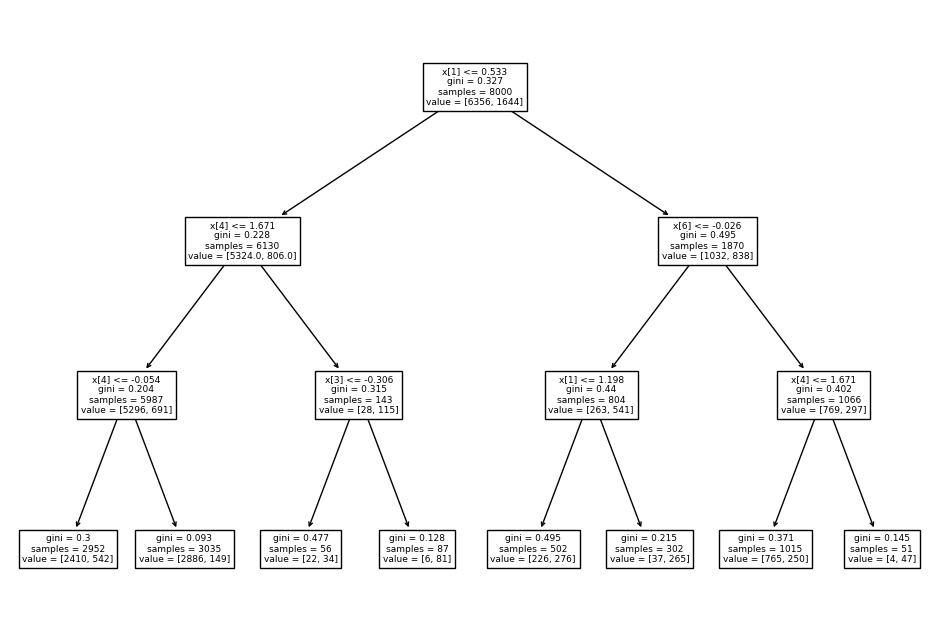

In [372]:
plt.figure(figsize=(12,8))
tree.plot_tree(decision_model.fit(x_train, y_train))

### 4. Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=28)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=28)

In [351]:
y_pred4 = rfc.predict(x_test)

In [354]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred4)}")

Accuracy Score : 0.8635


In [376]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### 5. AdaBoost

In [404]:
from sklearn.ensemble import AdaBoostClassifier

Ada_boost_clf = AdaBoostClassifier(n_estimators=60, learning_rate=1, random_state=42)
adaboost_model = Ada_boost_clf.fit(x_train, y_train)
y_pred5 = adaboost_model.predict(x_test)

C:\Users\marel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [402]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

Accuracy Score : 0.8625


In [382]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### 6. Xbboost 

In [406]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 726.2 kB/s eta 0:02:52
   ---------------------------------------- 0.1/124.9 MB 853.3 kB/s eta 0:02:27
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:42
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:52
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:45
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:35
   ---------------------------------------- 0.6/124.9 MB 1.2 MB/s eta 0:01:41
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 

In [414]:
import xgboost as xgb
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [426]:
y_pred6 = xgb_clf.predict(x_test)

In [428]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred6)}")

Accuracy Score : 0.865


In [430]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000



### 7. K Nearest neighbour (KNN)

In [432]:
from sklearn.neighbors import KNeighborsClassifier

In [452]:
knn_clf = KNeighborsClassifier(n_neighbors=33, p=2, metric='euclidean')

In [454]:
knn_clf.fit(x_train,y_train)
y_pred7 = knn_clf.predict(x_test)

In [456]:
print(f"Confusion Matrix :\n\n{confusion_matrix(y_pred7, y_test)}")

Confusion Matrix :

[[1578  295]
 [  29   98]]


In [458]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred7)}")

Accuracy Score : 0.838


### 8. Navie Bayes

In [462]:
from sklearn.naive_bayes import GaussianNB

In [464]:
Gaus_nb = GaussianNB()
Gaus_nb.fit(x_train,y_train)

GaussianNB()

In [466]:
y_pred8 = Gaus_nb.predict(x_test)

In [468]:
y_pred8

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [470]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred8)}")

Accuracy Score : 0.8335


In [472]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

